In [1]:
from audiomentations import Compose, Whispered, SimulatePhoneCall
import librosa
import soundfile as sf

In [2]:
x, fs = librosa.load('./35B.wav', sr=None)
augment = Compose([
    Whispered(window_width=400, step_coeff_update_size=0.01, order=5, p=1),
    # SimulatePhoneCall(low_frequency=300, high_frequency=3000, p=1),
])

augmented_samples = augment(samples=x, sample_rate=fs)
sf.write('35B_whispering2.wav', augmented_samples, fs)

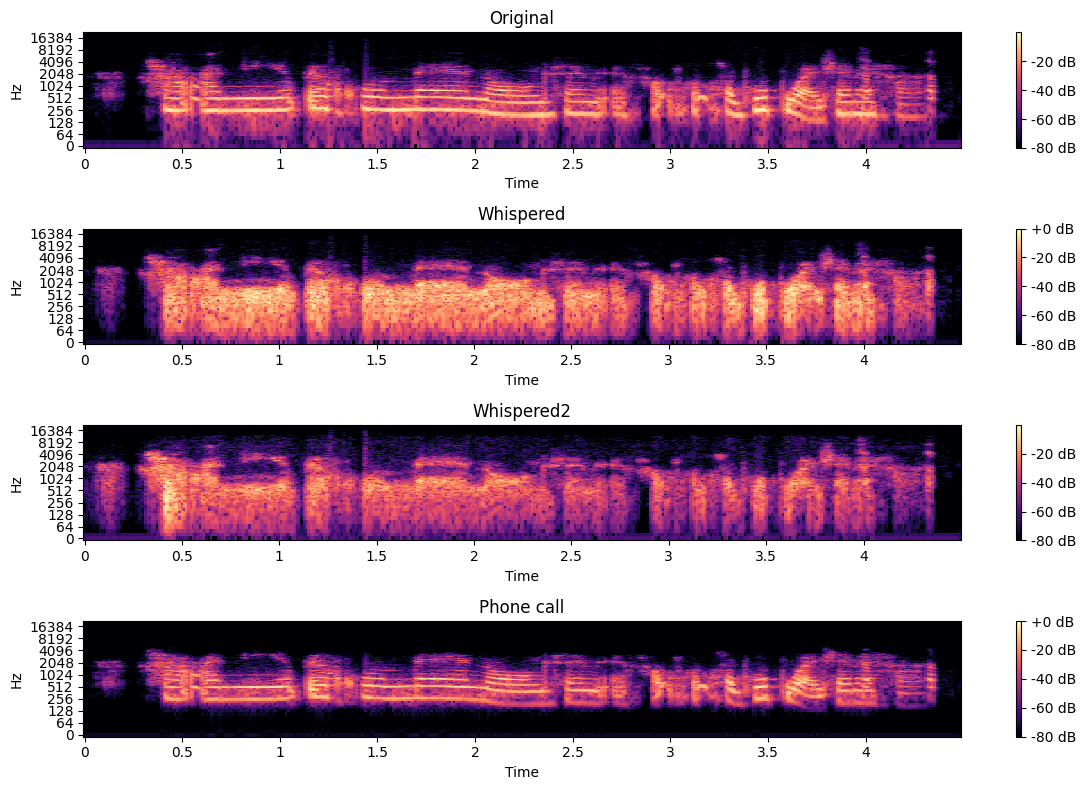

In [4]:
# Compare the spectrogram
import matplotlib.pyplot as plt
import numpy as np
import librosa.display
import librosa

x_ori, fs = librosa.load('./35B.wav', sr=None)
x_whis, _ = librosa.load('./35B_whispering.wav', sr=None)
x_whis2, _ = librosa.load('./35B_whispering2.wav', sr=None)
x_phone, _ = librosa.load('./35B_phone_call.wav', sr=None)

plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
D = librosa.amplitude_to_db(np.abs(librosa.stft(x_ori)), ref=np.max)
librosa.display.specshow(D, sr=fs, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Original')

plt.subplot(4, 1, 2)
D = librosa.amplitude_to_db(np.abs(librosa.stft(x_whis)), ref=np.max)
librosa.display.specshow(D, sr=fs, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Whispered')

plt.subplot(4, 1, 3)
D = librosa.amplitude_to_db(np.abs(librosa.stft(x_whis2)), ref=np.max)
librosa.display.specshow(D, sr=fs, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Whispered2')

plt.subplot(4, 1, 4)
D = librosa.amplitude_to_db(np.abs(librosa.stft(x_phone)), ref=np.max)
librosa.display.specshow(D, sr=fs, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Phone call')

plt.tight_layout()
plt.show()
